In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
data = scipy.io.loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [3]:
m,n = X.shape

# plotting the data

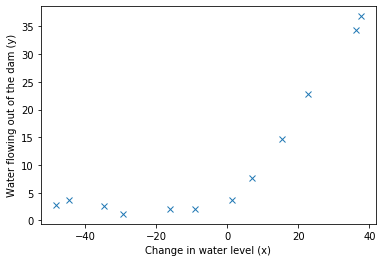

In [4]:
plt.plot(X,y,'x')
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

# Regularized linear regression cost function

In [5]:
def linearRegCostFunction(theta,X,y,lamda):
    m,n= X.shape
    J = 0
    theta = theta.reshape((n,1))
    temp = theta.copy()
    temp[0]=0
    z = X@theta
  
    J = (np.transpose(z-y)@(z-y))/(2*m) + (lamda/(2*m))*(np.transpose(temp)@temp)
    J = float(np.sum(J,axis=0))
    
    return J

In [6]:
def linearRegGradient(theta,X,y,lamda):
    m = X.shape[0]
    grad = np.zeros(theta.shape)
    
    temp = theta.copy()
    temp[0]=0
    z = X@theta  
    
    grad = (np.transpose(X)@(z-y))/m + (lamda/m)*temp
    
    return grad

In [12]:
theta = np.array([[1],[1]])
J = linearRegCostFunction(theta,np.append(np.ones((m,1)),X,axis=1), y, 1)
grad = linearRegGradient(theta,np.append(np.ones((m,1)),X,axis=1),y,1)
print(J)
print(grad)

303.9931922202643
[[-15.30301567]
 [598.25074417]]


# Train linear regression

In [13]:
def trainLinearReg(X,y,lamda):
    import numpy as np
    import scipy.optimize as op
    
    initial_theta = np.zeros((X.shape[1],1)) 
    
    Result = op.minimize(fun = linearRegCostFunction, x0 = initial_theta, args = (X, y,lamda))
    return Result.x

Text(0, 0.5, 'Water flowing out of the dam (y)')

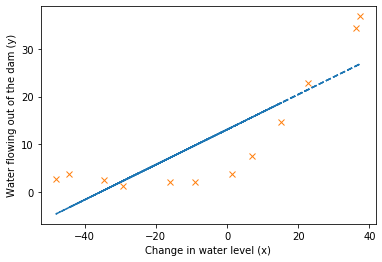

In [14]:
lamda =0
theta = trainLinearReg(np.append(np.ones((m,1)),X,axis=1), y, lamda)

plt.plot(X,np.append(np.ones((m,1)),X,axis=1)@theta,'--')
plt.plot(X,y,'x')
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)')

# Learing Curve for Linear regression

In [15]:
def learningCurve(X,y,Xval,yval,lamda):
    m,n=X.shape
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(0,m):
        theta = trainLinearReg(X[:i+1,:],y[:i+1],lamda)
        theta = theta.reshape((n,1))
        error_train[i] = linearRegCostFunction(theta,X[:i+1,:],y[:i+1],0)
        error_val[i]=linearRegCostFunction(theta,Xval,yval,0)
    
    return (error_train,error_val)

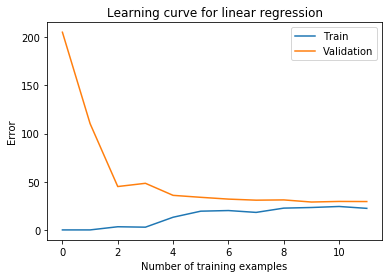

In [16]:
error_train,error_val = learningCurve(np.append(np.ones((m,1)),X,axis=1),y,np.append(np.ones((Xval.shape[0],1))
                                                                                     ,Xval,axis=1),yval,0)
plt.plot(range(0,m),error_train,label = 'Train')
plt.plot(range(0,m),error_val,label = 'Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

# Feature mapping for polynomial features

In [62]:
def polyFeatures(X,p):
    from sklearn.preprocessing import PolynomialFeatures
    trans = PolynomialFeatures(degree=p,include_bias = False)
    X_poly = trans.fit_transform(X)
    return X_poly

In [63]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    st_dev = np.std(X,axis=0)
    X_norm = X-mu
    X_norm = X_norm/st_dev
    return X_norm

In [125]:
X_poly = polyFeatures(X,8)
X_poly = featureNormalize(X_poly)
X_poly = np.append(np.ones((m,1)),X_poly,axis=1)

In [126]:
Xtest_poly = polyFeatures(Xtest,8)
Xtest_poly = featureNormalize(Xtest_poly)
Xtest_poly = np.append(np.ones((Xtest.shape[0],1)),Xtest_poly,axis=1)

In [127]:
Xval_poly = polyFeatures(Xval,8)
Xval_poly = featureNormalize(Xval_poly)
Xval_poly = np.append(np.ones((Xval.shape[0],1)),Xval_poly,axis=1)

# Learning Curve for polynomial regression

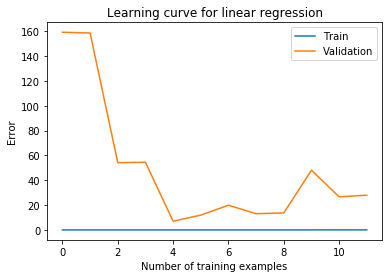

In [128]:
error_train,error_val = learningCurve(X_poly,y,Xval_poly,yval,0)
plt.plot(range(0,m),error_train,label = 'Train')
plt.plot(range(0,m),error_val,label = 'Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

# Validation for selecting lamda

In [129]:
def validationCurve(X, y, Xval, yval,lamda_vec= [0 ,.001,0.003 ,.01,0.03 ,.1,0.3,1,3 ,10]):
     
    error_train = np.zeros((len(lamda_vec),1))
    error_val = np.zeros((len(lamda_vec),1))
    display(len(lamda_vec))
    for i  in range(0,len(lamda_vec)):
        lamda = lamda_vec[i]
        theta = trainLinearReg(X,y,lamda)
        error_train[i] = linearRegCostFunction(theta,X,y,0)
        error_val[i] = linearRegCostFunction(theta,Xval,yval,0)
        print(error_train[i],error_val[i],lamda)
    return (error_train,error_val)

10

[0.02889052] [27.9453215] 0
[0.10797883] [9.73246797] 0.001
[0.16678686] [14.38287561] 0.003
[0.21795177] [15.06372363] 0.01
[0.27515028] [12.19542696] 0.03
[0.43865815] [8.14965844] 0.1
[0.86816795] [5.3780093] 0.3
[1.95869056] [4.55653534] 1
[4.52510643] [4.99882683] 3
[14.82577659] [12.43694082] 10


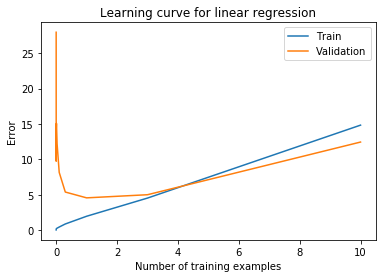

In [130]:
lamda_vec= [0 ,.001,0.003 ,.01, 0.03 ,.1, 0.3 ,1,3 ,10]
error_train,error_val = validationCurve(X_poly, y, Xval_poly, yval)
plt.plot(lamda_vec,error_train,label = 'Train')
plt.plot(lamda_vec,error_val,label = 'Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()